# Idea: Figure out a way to cluster the images with low occuring labels

In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [117]:
df_train = pd.read_csv('df_final.csv', index_col=0)
df_train.drop(['x', 'y', 'aspect_ratio'], axis=1, inplace=True)

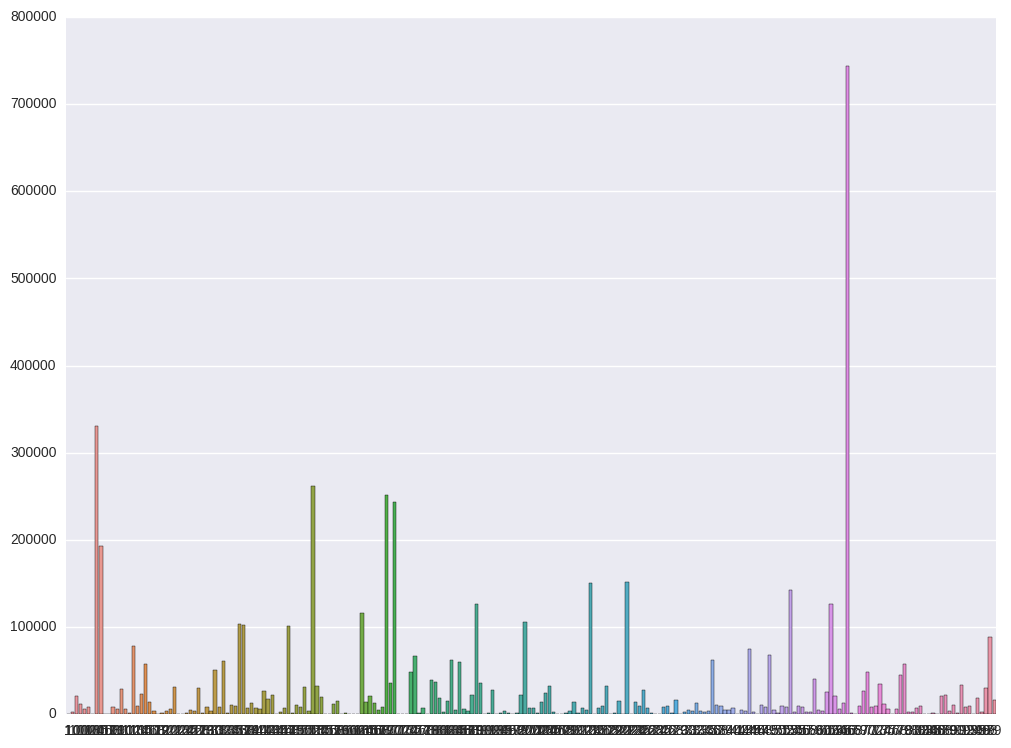

In [118]:
label_nos = df_train.sum(axis=0)
fig = plt.figure(figsize=(12, 9))
sns.barplot(label_nos.index, label_nos.values)

In [119]:
print("Mean number of images for each label:", label_nos.mean())
print("Median number of images for each label:", label_nos.median())
print("Std for number of images for each label:", label_nos.std())
print("Minimum number of images for label:", label_nos.min())
print("Maximum number of images for label:", label_nos.max())

Mean number of images for each label: 25973.043859649122
Median number of images for each label: 7367.0
Std for number of images for each label: 65866.41357164529
Minimum number of images for label: 7
Maximum number of images for label: 743250


In [120]:
np.percentile(label_nos, 15)

628.6499999999997

In [121]:
label_nos[label_nos < 7000].shape

(109,)

# Check which labels in the model most inaccurate about

In [3]:
from os.path import join

import ast

from sklearn.metrics import fbeta_score

In [4]:
df_predictions = pd.read_csv('validation_prediction.csv', index_col=0)
df_predictions.shape

(9897, 228)

In [5]:
def labels_one_hot(labels):
    
    onehot_label = [0.] * 228
    for label in labels:
        onehot_label[int(label) - 1] = 1.
    
    return onehot_label

ground_truth = pd.DataFrame.from_csv(join('/home/ankur/kaggle/fashion/machinelearninginpractice/fashion_challenge/', "csv/valid_labels.csv"))
labels_gt = []
for i in range(9897):
    row = ground_truth.iloc[i, :]
    label = labels_one_hot(ast.literal_eval(row['labelId']))
    labels_gt.append(label)
labels_gt = np.array(labels_gt)
print(labels_gt.shape)

(9897, 228)


In [6]:
df_true = pd.DataFrame(labels_gt.astype('int'), index=df_predictions.index, columns=df_predictions.columns)

In [7]:
df_true.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,2.451017e-05,0.102013,8.707671e-06,0.000052,0.000102,5.071181e-06,0.015584,7.448025e-06,0.016403,0.000008,...,0.000015,0.000657,8.257736e-08,0.114987,2.178623e-06,0.010727,0.123924,0.011953,0.000031,0.000438
1,3.337909e-06,0.034478,5.967688e-05,0.002960,0.006547,1.075456e-04,0.024692,1.710136e-05,0.006494,0.000067,...,0.000243,0.000216,5.910555e-07,0.157534,8.455056e-06,0.003576,0.008777,0.005352,0.000137,0.000121
2,8.113144e-10,0.307284,3.591576e-06,0.000022,0.000001,1.203289e-05,0.000408,7.434906e-07,0.002414,0.000132,...,0.000026,0.064657,1.649075e-09,0.043173,5.824598e-09,0.000040,0.007487,0.004672,0.000031,0.000036
3,4.579593e-07,0.001863,1.018960e-05,0.001430,0.006803,2.434375e-04,0.005544,1.020730e-04,0.000154,0.000003,...,0.000005,0.000033,1.268762e-07,0.367915,1.995150e-06,0.000197,0.000147,0.011680,0.000027,0.000114
4,2.565986e-06,0.012797,3.133312e-07,0.000007,0.000004,9.141575e-07,0.005023,1.902943e-05,0.000760,0.000012,...,0.000003,0.000287,3.625195e-08,0.193114,7.912568e-08,0.000168,0.002596,0.009459,0.000010,0.000446


In [9]:
assert(all(df_true.columns == df_predictions.columns))
assert(all(df_true.index == df_predictions.index))

In [10]:
# Because pd.where doesn't work. Why god why

df_predictions[df_predictions < 0.5] = 0
df_predictions[df_predictions > 0.5] = 1

In [11]:
df_predictions = df_predictions.astype('int')
df_predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fbeta_score(df_true, df_predictions, beta=1, average='samples')

/home/ankur/miniconda3/envs/mlip/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.4635488255016373

In [13]:
labelwise_fscore = []
for label in df_predictions.columns:
    score = fbeta_score(df_true.loc[:, label], df_predictions.loc[:, label], beta=1)
    labelwise_fscore.append(score)
print(np.array(labelwise_fscore))

/home/ankur/miniconda3/envs/mlip/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.         0.         0.07692308 0.03508772 0.12093023 0.41176471
 0.05737705 0.         0.         0.02272727 0.12987013 0.
 0.         0.         0.59163987 0.         0.50315433 0.34502924
 0.20262097 0.4670088  0.04761905 0.         0.         0.
 0.         0.45341615 0.         0.44897959 0.         0.07692308
 0.         0.24       0.85416667 0.88888889 0.         0.1462141
 0.         0.         0.25       0.         0.         0.
 0.19672131 0.37683182 0.         0.         0.0075188  0.
 0.45090439 0.         0.81918819 0.42       0.37473684 0.
 0.         0.02272727 0.         0.         0.59114315 0.
 0.56431535 0.45488521 0.         0.         0.61666667 0.96918768
 0.         0.         0.         0.31610044 0.10526316 0.37681159
 0.62884161 0.34693878 0.         0.         0.         0.03443329
 0.0060698  0.         0.18518519 0.         0.         0.
 0.         0.         0.         0.22695035 0.04878049 0.
 0.42727273 0.37037037 0.53333333 0.         0.16129032 0.09

In [14]:
labelwise_fscore = np.array(labelwise_fscore)

In [15]:
np.argwhere(labelwise_fscore == 0).flatten()

array([  0,   1,   7,   8,  11,  12,  13,  15,  21,  22,  23,  24,  26,
        28,  30,  34,  36,  37,  39,  40,  41,  44,  45,  47,  49,  53,
        54,  56,  57,  59,  62,  63,  66,  67,  68,  74,  75,  76,  79,
        81,  82,  83,  84,  85,  86,  89,  93, 103, 106, 107, 110, 111,
       114, 116, 117, 118, 119, 121, 123, 124, 133, 139, 140, 144, 145,
       148, 149, 155, 156, 159, 160, 161, 162, 165, 167, 171, 172, 173,
       177, 178, 181, 190, 191, 193, 194, 196, 197, 198, 200, 203, 205,
       206, 207, 208, 210, 212, 214, 215, 218, 220, 222, 224, 227])

In [16]:
label_nos[label_nos < 7000].index

NameError: name 'label_nos' is not defined

In [133]:
set(map(lambda x: int(x) - 1, label_nos[label_nos < 7000].index)) - set(np.argwhere(labelwise_fscore == 0).flatten())

{2,
 3,
 4,
 5,
 9,
 10,
 20,
 29,
 32,
 33,
 38,
 42,
 80,
 88,
 95,
 101,
 120,
 122,
 125,
 126,
 128,
 129,
 138,
 151,
 176,
 184,
 186,
 187,
 195,
 201}

## f1 score based on image size

In [17]:
from scipy.ndimage import imread


def get_size(file_name):
    img = imread('/home/ankur/kaggle/fashion/validation/{filename}.jpg'.format(filename=str(file_name+1)))
    return img.shape[0], img.shape[1], img.shape[0]/img.shape[1]
    
sizes = df_true.index.map(get_size)

In [18]:
x = np.zeros(len(sizes))
y = np.zeros(len(sizes))
a_ratio = np.zeros(len(sizes))

for i in range(len(sizes)):
    x[i], y[i], a_ratio[i] = sizes[i]


In [19]:
x

array([600., 600., 600., ..., 600., 600., 600.])

In [20]:
y

array([600., 600., 450., ..., 418., 578., 600.])

In [21]:
df_true['x'] = x
df_true['y'] = y
df_true['a_ratio'] = a_ratio
df_true.to_csv('df_validation_true.csv')

In [22]:
df_true = pd.read_csv('df_validation_true.csv', index_col=0)
df_true.x = (round(df_true.x / 100) * 100).astype('int')
df_true.y = (round(df_true.y / 100) * 100).astype('int')

In [23]:
df_true.groupby(['x', 'y']).size()

x    y  
0    0         1
100  100       9
     200       2
200  100       2
     200      37
     300       4
     400       1
     600       2
300  200      38
     300     181
     400      19
     500       8
     600       9
400  200      12
     300      94
     400     310
     500      44
     600     413
500  200       5
     300      55
     400     158
     500     681
     600     275
600  200       9
     300      77
     400    1002
     500     557
     600    5892
dtype: int64

In [36]:
def sizewise_f1(df):
    df_temp = df_predictions.loc[df.index, :]
    return fbeta_score(df.drop(['x', 'y', 'a_ratio'], axis=1), df_temp, beta=1, average='samples')

df_true.groupby(['x', 'y']).apply(sizewise_f1)

/home/ankur/miniconda3/envs/mlip/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


x    y  
0    0      0.000000
100  100    0.450352
     200    0.500000
200  100    0.392857
     200    0.436085
     300    0.472222
     400    0.250000
     600    0.277778
300  200    0.440763
     300    0.454249
     400    0.411503
     500    0.396861
     600    0.330126
400  200    0.371999
     300    0.487923
     400    0.464877
     500    0.496530
     600    0.438956
500  200    0.352168
     300    0.435791
     400    0.472294
     500    0.477784
     600    0.457110
600  200    0.360590
     300    0.468839
     400    0.463830
     500    0.463422
     600    0.464852
dtype: float64

In [35]:
fbeta_score(df_true.drop(['x', 'y', 'a_ratio'], axis=1), df_predictions, beta=1, average='samples')

/home/ankur/miniconda3/envs/mlip/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.4635488255016373

In [34]:
fbeta_score(df_true.drop(['x', 'y', 'a_ratio'], axis=1), df_predictions, beta=1, average='samples')

/home/ankur/miniconda3/envs/mlip/lib/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.4635488255016373